## EDA on active fire points from 2012 to 2024
******************************************************************************
**Date:** 27th Dec 2024

**Written by:** Priyanka N
*******************************************************************************

The active fire data was downloaded from the following website:
https://firms.modaps.eosdis.nasa.gov/active_fire/

Active fire data attributes: https://www.earthdata.nasa.gov/data/tools/firms/active-fire-data-attributes-modis-viirs#toc-attribute-fields-for-nrt-viirs-375m-active-fire-data

**Resolution of the dataset:** 375m

In this notebook, the following steps are taken:

1. Filtered the active fire points for Uttarakand and saved in a separate file.
2. Done the analysis on the dataset at state and district levels.

________________________________________________________________________________

## Filtering the data for Uttarakhand using the shapefile for Uttarakhand.

In [11]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the Uttarakhand shapefile
uttarakhand_shapefile_path = "/content/drive/MyDrive/Colab Notebooks/Forest_fire_prediction/Uttarakhand/uttarakhand_WGS1984.shp"
uttarakhand_boundary = gpd.read_file(uttarakhand_shapefile_path)

# Ensure the shapefile is in the correct CRS (Coordinate Reference System)
uttarakhand_boundary = uttarakhand_boundary.to_crs("EPSG:4326")  # WGS84


In [ ]:
# Folder containing all the CSV files
folder_path = "/content/drive/MyDrive/Colab Notebooks/Forest_fire_prediction/VIIRS_SNPP_Active_fire_data"

# Specify the prefix for file names to process
file_prefix = "viirs-snpp"

# Initialize an empty DataFrame to store filtered data
combined_data = pd.DataFrame()

# Iterate through all CSV files in the folder
for file_name in os.listdir(folder_path):
    # Process only files starting with the specified prefix
    if file_name.startswith(file_prefix) and file_name.endswith(".csv"):
        print(f"Processing {file_name}...")

        # Load the CSV file into a DataFrame
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        # Convert to GeoDataFrame with geometry (latitude, longitude)
        geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
        gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

        # Spatial join: Filter points within Uttarakhand
        filtered_gdf = gpd.sjoin(gdf, uttarakhand_boundary, predicate="within")

        # Append the filtered data to the combined DataFrame
        combined_data = pd.concat([combined_data, filtered_gdf], ignore_index=True)

# Drop unnecessary geometry columns if needed
combined_data = combined_data.drop(columns=["geometry", "index_right"], errors="ignore")

# Save the combined data to a CSV file
output_file = "filtered_active_fire_data_uttarakhand.csv"
combined_data.to_csv(output_file, index=False)

print(f"Filtered data saved to {output_file}")


Processing viirs-snpp_2023_India.csv...
Processing viirs-snpp_2022_India.csv...
Processing viirs-snpp_2021_India.csv...
Processing viirs-snpp_2020_India.csv...
Processing viirs-snpp_2017_India.csv...
Processing viirs-snpp_2018_India.csv...
Processing viirs-snpp_2019_India.csv...
Processing viirs-snpp_2015_India.csv...
Processing viirs-snpp_2016_India.csv...
Processing viirs-snpp_2014_India.csv...
Processing viirs-snpp_2013_India.csv...
Processing viirs-snpp_2012_India.csv...
Processing viirs-snpp_2024_India.csv...
Filtered data saved to filtered_active_fire_data_uttarakhand.csv


## Analysis on the filtered dataset.

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Forest_fire_prediction/filtered_active_fire_data_uttarakhand.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186714 entries, 0 to 186713
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    186714 non-null  float64
 1   longitude   186714 non-null  float64
 2   bright_ti4  186714 non-null  float64
 3   scan        186714 non-null  float64
 4   track       186714 non-null  float64
 5   acq_date    186714 non-null  object 
 6   acq_time    186714 non-null  int64  
 7   satellite   186714 non-null  object 
 8   instrument  186714 non-null  object 
 9   confidence  186714 non-null  object 
 10  version     186714 non-null  int64  
 11  bright_ti5  186714 non-null  float64
 12  frp         186714 non-null  float64
 13  daynight    186714 non-null  object 
 14  type        186714 non-null  int64  
 15  STATE       186714 non-null  object 
 16  State_LGD   186714 non-null  int64  
 17  Shape_Leng  186714 non-null  float64
 18  Shape_Area  186714 non-null  float64
dtypes:

In [ ]:
df.isnull().any()

latitude      False
longitude     False
bright_ti4    False
scan          False
track         False
acq_date      False
acq_time      False
satellite     False
instrument    False
confidence    False
version       False
bright_ti5    False
frp           False
daynight      False
type          False
STATE         False
State_LGD     False
Shape_Leng    False
Shape_Area    False
dtype: bool

In [ ]:
# Summary statistics
print(df.describe())

# Count the number of fire points
print(f"Total fire points: {len(df)}")

# Distribution of confidence levels
print(df['confidence'].value_counts())


            latitude      longitude     bright_ti4           scan  \
count  186714.000000  186714.000000  186714.000000  186714.000000   
mean       29.847095      79.150836     324.052448       0.452860   
std         0.524411       0.659143      18.232638       0.080701   
min        28.726480      77.582870     284.970000       0.320000   
25%        29.450565      78.628430     305.610000       0.390000   
50%        29.845440      79.201000     329.530000       0.430000   
75%        30.218238      79.700790     338.340000       0.500000   
max        31.239050      80.833250     367.000000       0.800000   

               track       acq_time   version     bright_ti5            frp  \
count  186714.000000  186714.000000  186714.0  186714.000000  186714.000000   
mean        0.462796    1378.029917       2.0     296.475977       4.109239   
std         0.107870     630.609363       0.0       9.905510       5.502525   
min         0.360000     639.000000       2.0     249.420000  

In [ ]:
df.columns

Index(['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_ti5', 'frp', 'daynight', 'type', 'STATE', 'State_LGD',
       'Shape_Leng', 'Shape_Area'],
      dtype='object')

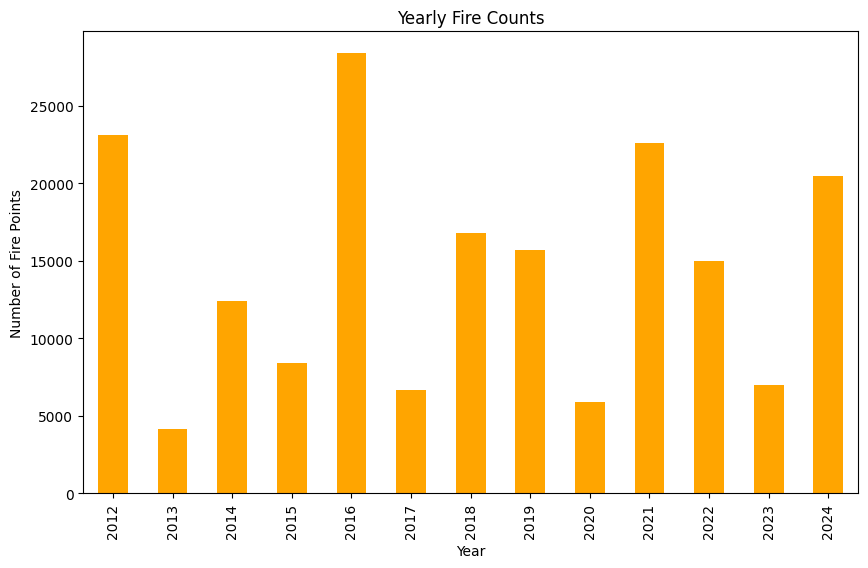

In [ ]:
# Convert 'acq_date' to datetime format
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Group by year or month
yearly_fire_counts = df.groupby(df['acq_date'].dt.year).size()
monthly_fire_counts = df.groupby(df['acq_date'].dt.month).size()

# Plot yearly trends
plt.figure(figsize=(10, 6))
yearly_fire_counts.plot(kind='bar', color='orange')
plt.title('Yearly Fire Counts')
plt.xlabel('Year')
plt.ylabel('Number of Fire Points')
plt.show()


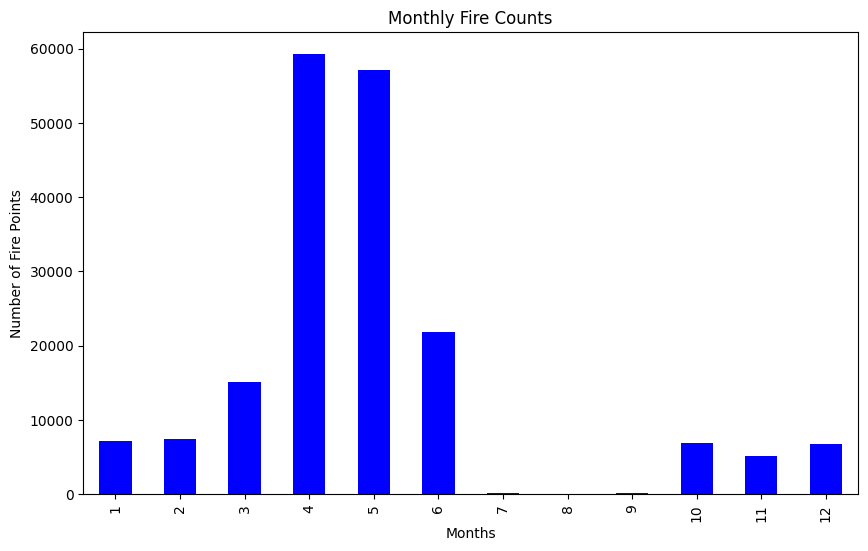

In [ ]:
plt.figure(figsize=(10, 6))
monthly_fire_counts.plot(kind='bar', color='blue')
plt.title('Monthly Fire Counts')
plt.xlabel('Months')
plt.ylabel('Number of Fire Points')
plt.show()

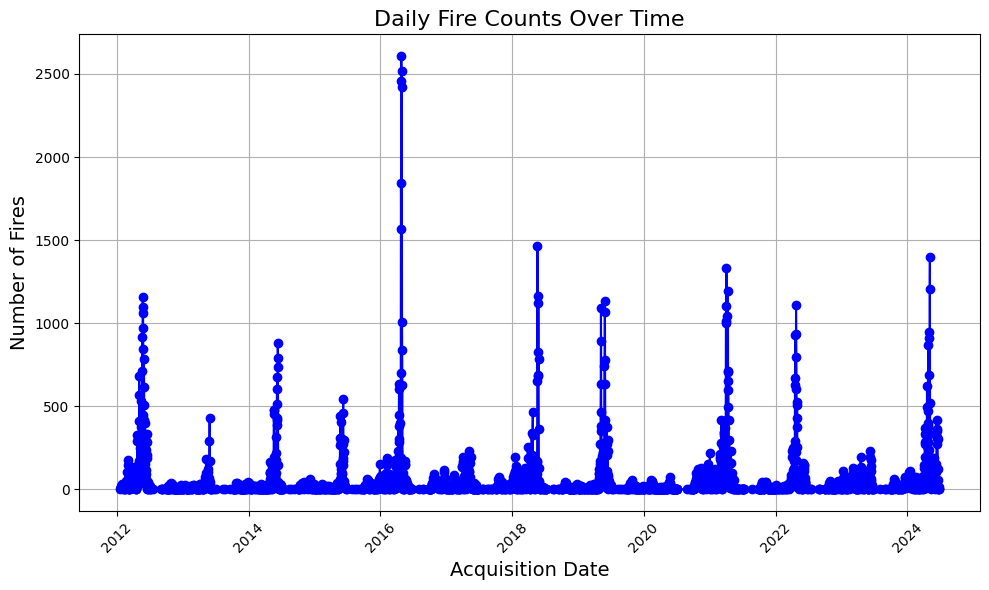

In [ ]:
# Group data by date and count occurrences
daily_fire_counts = df.groupby('acq_date').size()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(daily_fire_counts.index, daily_fire_counts.values, marker='o', linestyle='-', color='blue')

# Add labels and title
plt.title('Daily Fire Counts Over Time', fontsize=16)
plt.xlabel('Acquisition Date', fontsize=14)
plt.ylabel('Number of Fires', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Filter data for a specific year (e.g., 2024)

def fire_counts_by_year(year):
  df_year = df[df['acq_date'].dt.year == year]

  # Group data by date and count occurrences
  daily_fire_counts = df_year.groupby('acq_date').size()

  # Plot the data
  plt.figure(figsize=(10, 6))
  plt.plot(daily_fire_counts.index, daily_fire_counts.values, marker='o', linestyle='-', color='orange')

  # Add labels and title
  plt.title(f'Daily Fire Counts for {year}', fontsize=16)
  plt.xlabel('Acquisition Date', fontsize=14)
  plt.ylabel('Number of Fires', fontsize=14)

  # Rotate x-axis labels for better visibility
  plt.xticks(rotation=45)

  # Display the plot
  plt.grid()
  plt.tight_layout()
  plt.show()


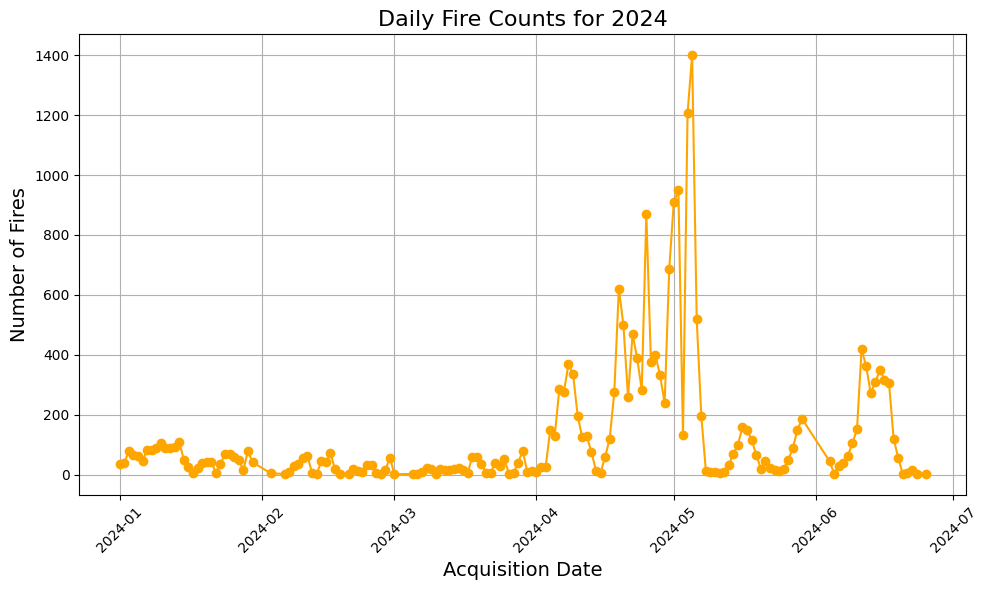

In [ ]:
fire_counts_by_year(2024)

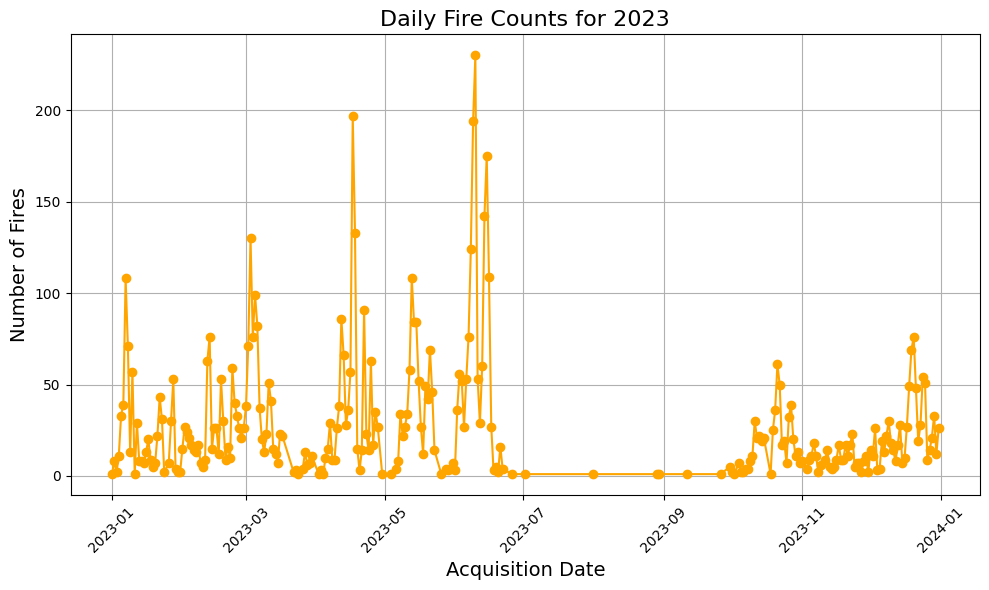

In [ ]:
fire_counts_by_year(2023)

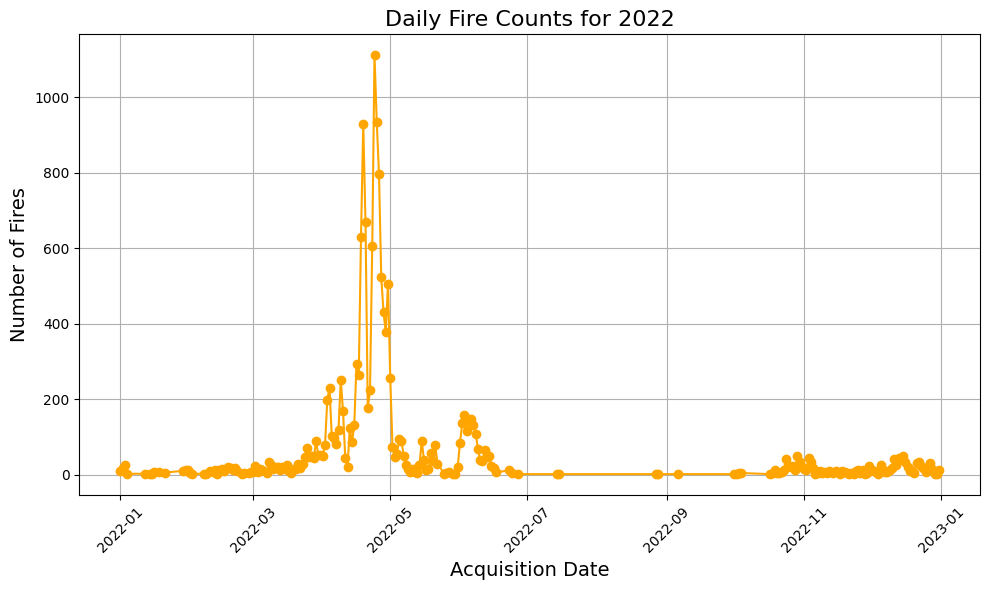

In [ ]:
fire_counts_by_year(2022)

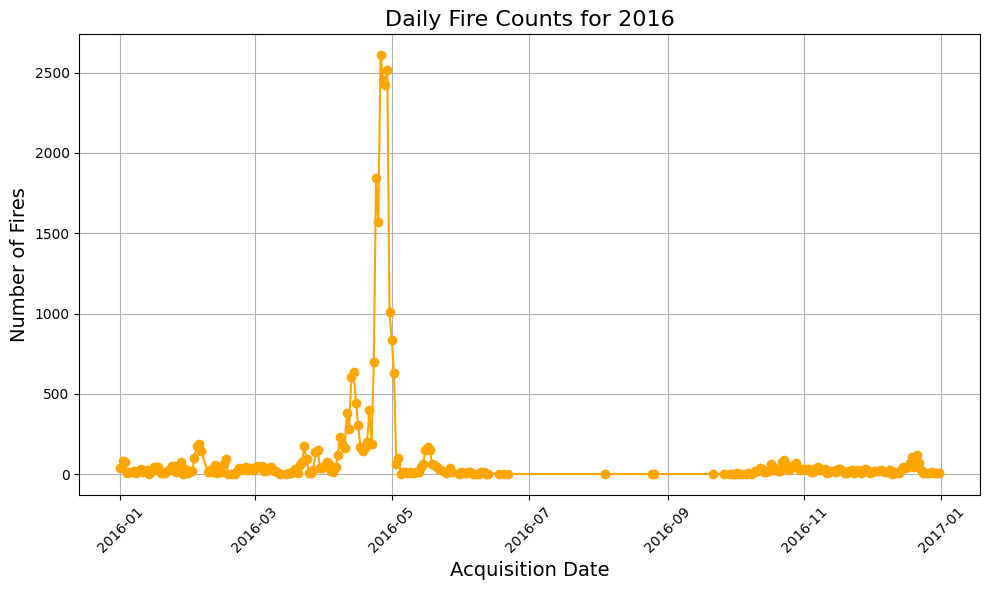

In [ ]:
fire_counts_by_year(2016)

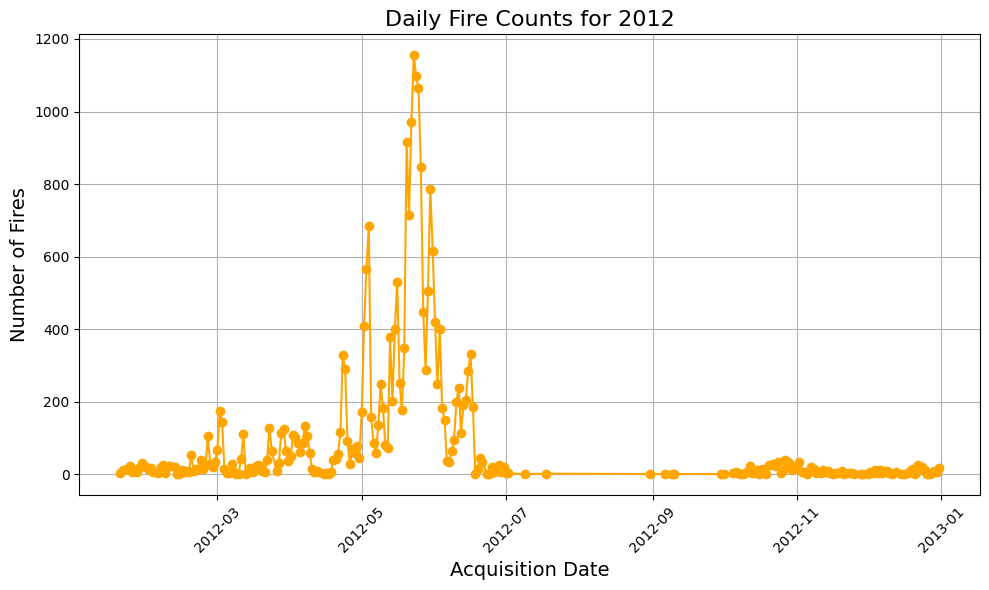

In [ ]:
fire_counts_by_year(2012)

In [21]:
def fire_counts_by_daynight(df):
    # Convert 'acq_date' to datetime and extract the year
    df['acq_date'] = pd.to_datetime(df['acq_date'])
    df['year'] = df['acq_date'].dt.year

    # Group data by year and day_night
    daily_fire_counts = df.groupby([df['acq_date'].dt.date, 'daynight']).size().reset_index(name='fire_count')

    # Separate data for day and night
    day_data = daily_fire_counts[daily_fire_counts['daynight'] == 'D']
    night_data = daily_fire_counts[daily_fire_counts['daynight'] == 'N']

    # Plot data for day
    plt.figure(figsize=(12, 6))
    plt.plot(day_data['acq_date'], day_data['fire_count'], marker='o', linestyle='-', label='Day Fires', color='orange')

    # Plot data for night
    plt.plot(night_data['acq_date'], night_data['fire_count'], marker='o', linestyle='-', label='Night Fires', color='blue')

    # Add labels and title
    plt.title('Daily Fire Counts by Day and Night', fontsize=16)
    plt.xlabel('Acquisition Date', fontsize=14)
    plt.ylabel('Number of Fires', fontsize=14)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)
    plt.legend()

    # Display the plot
    plt.grid()
    plt.tight_layout()
    plt.show()


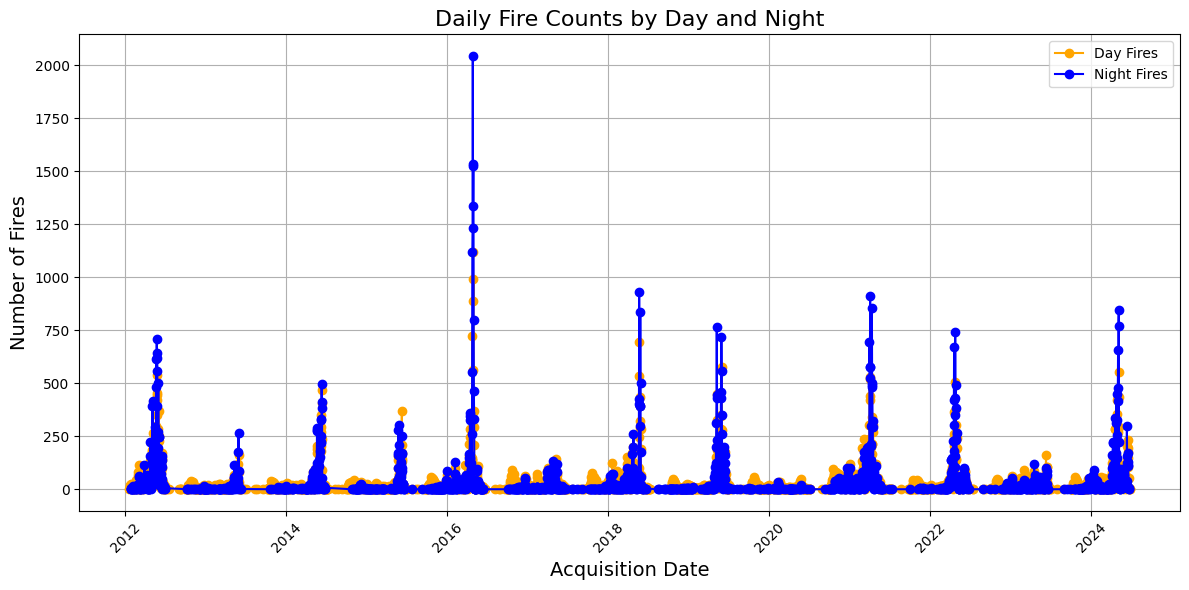

In [22]:
fire_counts_by_daynight(df)

In [16]:
def fire_counts_by_year(df):
    # Convert 'acq_date' to datetime and extract the year
    df['acq_date'] = pd.to_datetime(df['acq_date'])
    df['year'] = df['acq_date'].dt.year

    # Group data by year and day_night, and count occurrences
    yearly_fire_counts = df.groupby(['year', 'daynight']).size().reset_index(name='fire_count')

    # Create a bar plot
    plt.figure(figsize=(10, 6))

    # Plot bars for day and night
    for day_night, color in zip(['D', 'N'], ['orange', 'blue']):
        subset = yearly_fire_counts[yearly_fire_counts['daynight'] == day_night]
        plt.bar(subset['year'], subset['fire_count'], label=f"{'Day' if day_night == 'D' else 'Night'} Fires", color=color, alpha=0.7)

    # Add labels and title
    plt.title('Yearly Fire Counts by Day and Night', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Fires', fontsize=14)

    # Add legend
    plt.legend()

    # Display the plot
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


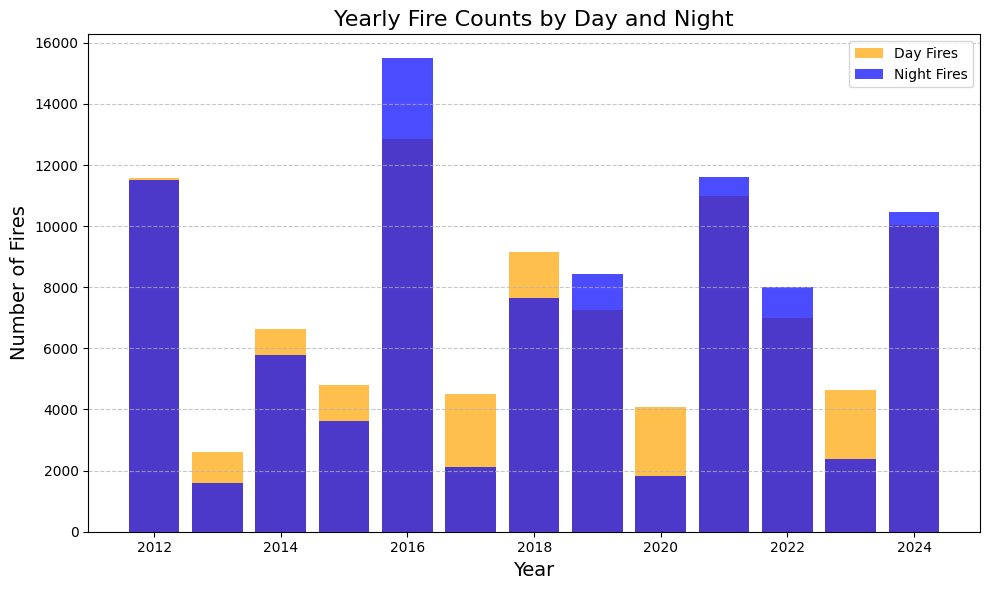

In [17]:
fire_counts_by_year(df)

In [25]:
def fire_counts_by_year_side_by_side(df):
    # Convert 'acq_date' to datetime and extract the year
    df['acq_date'] = pd.to_datetime(df['acq_date'])
    df['year'] = df['acq_date'].dt.year

    # Group data by year and day_night, and count occurrences
    yearly_fire_counts = df.groupby(['year', 'daynight']).size().unstack(fill_value=0)

    # Extract years and counts for day and night
    years = yearly_fire_counts.index
    day_counts = yearly_fire_counts['D']
    night_counts = yearly_fire_counts['N']

    # Set up bar width and positions
    bar_width = 0.4
    x = np.arange(len(years))

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(x - bar_width / 2, day_counts, width=bar_width, label='Day Fires', color='orange')
    plt.bar(x + bar_width / 2, night_counts, width=bar_width, label='Night Fires', color='blue')

    # Add labels and title
    plt.title('Yearly Fire Counts: Day vs Night', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Fires', fontsize=14)
    plt.xticks(x, years, rotation=45)  # Add year labels

    # Add legend
    plt.legend()

    # Display the plot
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


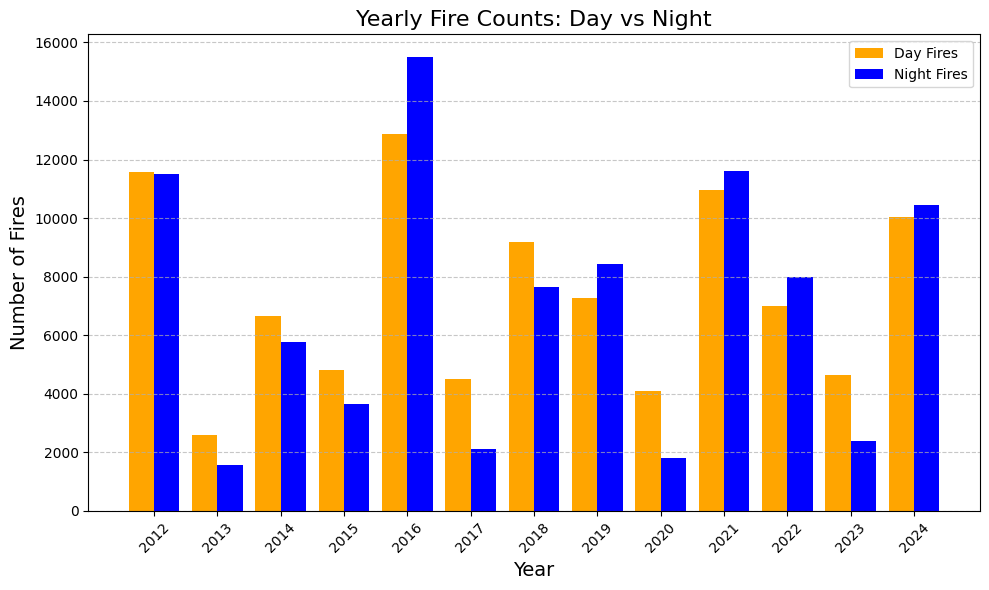

In [26]:
fire_counts_by_year_side_by_side(df)

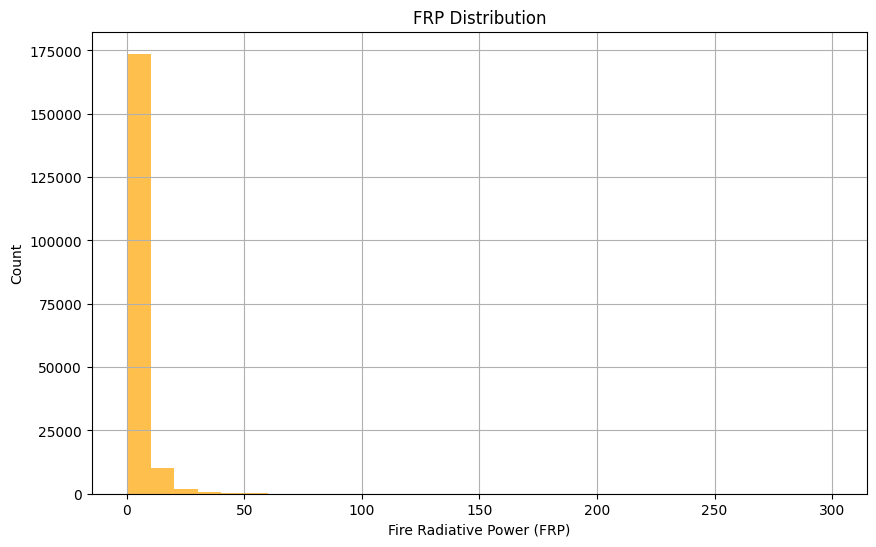

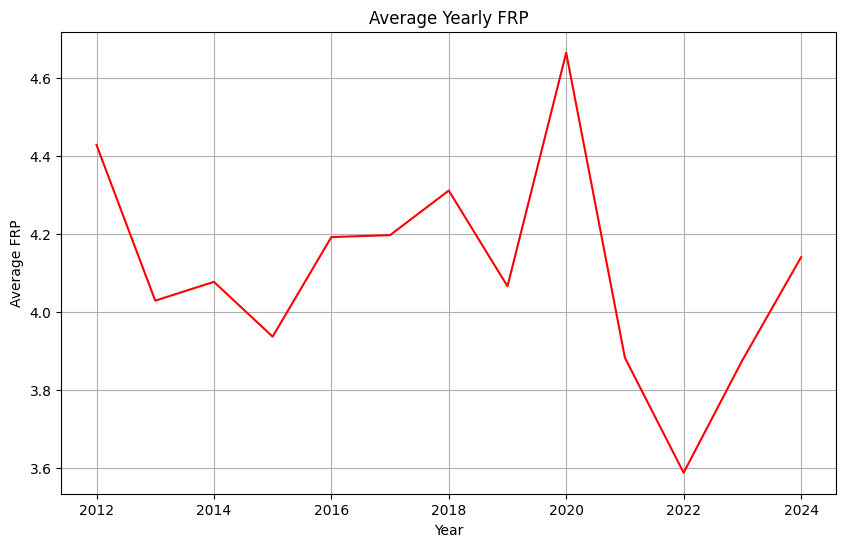

In [ ]:
# Plot FRP distribution
plt.figure(figsize=(10, 6))
df['frp'].plot(kind='hist', bins=30, color='orange', alpha=0.7)
plt.title('FRP Distribution')
plt.xlabel('Fire Radiative Power (FRP)')
plt.ylabel('Count')
plt.grid("on")
plt.show()

# FRP trends over time
df.groupby(df['acq_date'].dt.year)['frp'].mean().plot(kind='line', figsize=(10, 6), color='red')
plt.title('Average Yearly FRP')
plt.xlabel('Year')
plt.ylabel('Average FRP')
plt.grid('on')
plt.show()


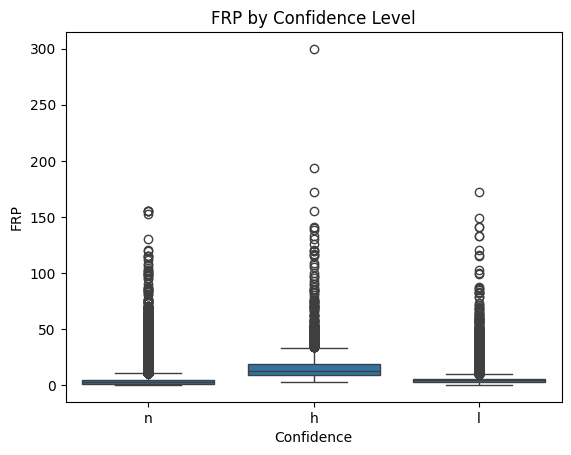

In [ ]:
import seaborn as sns

# Confidence vs FRP
sns.boxplot(x='confidence', y='frp', data=df)
plt.title('FRP by Confidence Level')
plt.xlabel('Confidence')
plt.ylabel('FRP')
plt.show()


## Analysis by districts

In [ ]:
# Load the district shapefile
districts_gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Forest_fire_prediction/Uttarakhand Districts/uttarakhand_districts.shp")

# Ensure the district shapefile and fire data use the same CRS
districts_gdf = districts_gdf.to_crs("EPSG:4326")  # Assuming WGS84 for fire points

In [ ]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
fire_gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Perform spatial join
fires_with_districts = gpd.sjoin(fire_gdf, districts_gdf, how="left", predicate="intersects")

In [ ]:
fires_with_districts.head()

latitude  longitude  bright_ti4  scan  track   acq_date  acq_time  \
0  30.47758   79.40485      304.26  0.46   0.39 2023-01-01      2014   
1  28.95413   79.75963      329.74  0.49   0.40 2023-01-02       731   
2  29.16875   79.09808      329.08  0.52   0.41 2023-01-02       731   
3  29.93845   80.53337      339.87  0.44   0.38 2023-01-02       731   
4  29.93838   80.53476      330.97  0.44   0.38 2023-01-02       731   

  satellite instrument confidence  ...  Shape_Area_left  \
0         N      VIIRS          n  ...     5.196449e+10   
1         N      VIIRS          n  ...     5.196449e+10   
2         N      VIIRS          n  ...     5.196449e+10   
3         N      VIIRS          n  ...     5.196449e+10   
4         N      VIIRS          n  ...     5.196449e+10   

                    geometry  index_right           District  STATE_right  \
0  POINT (79.40485 30.47758)           10            CHAMOLI  UTTARAKHAND   
1  POINT (79.75963 28.95413)            9  UDHAM SINGH NAGAR  UTTARAKHAND   
2  POINT (79.09808 29.16875)            9  UDHAM SINGH NAGAR  UTTARAKHAND   
3  POINT (80.53337 29.93845)           11        PITHORAGARH  UTTARAKHAND   
4  POINT (80.53476 29.93838)           11        PITHORAGARH  UTTARAKHAND   

  REMARKS  State_LGD_right  DISTRICT_L  Shape_Leng_right Shape_Area_right  
0    None                5          47     522183.067166     7.618645e+09  
1    None                5          56     568974.772093     2.587998e+09  
2    None                5          56     568974.772093     2.587998e+09  
3    None                5          53     596635.247595     7.034591e+09  
4    None                5          53     596635.247595     7.034591e+09  

[5 rows x 28 columns]

In [ ]:
fires_with_districts.columns

Index(['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_ti5', 'frp', 'daynight', 'type', 'STATE_left', 'State_LGD_left',
       'Shape_Leng_left', 'Shape_Area_left', 'geometry', 'index_right',
       'District', 'STATE_right', 'REMARKS', 'State_LGD_right', 'DISTRICT_L',
       'Shape_Leng_right', 'Shape_Area_right'],
      dtype='object')

             District  fire_count
0              ALMORA       22838
1           BAGESHWAR        8229
2             CHAMOLI       11378
3           CHAMPAWAT       10913
4            DEHRADUN        6797
5            HARIDWAR        4575
6            NAINITAL       24648
7       PAURI GARHWAL       32936
8         PITHORAGARH        9858
9         RUDRAPRAYAG        4786
10      TEHRI GARHWAL       19423
11  UDHAM SINGH NAGAR       16856
12         UTTARKASHI       13477


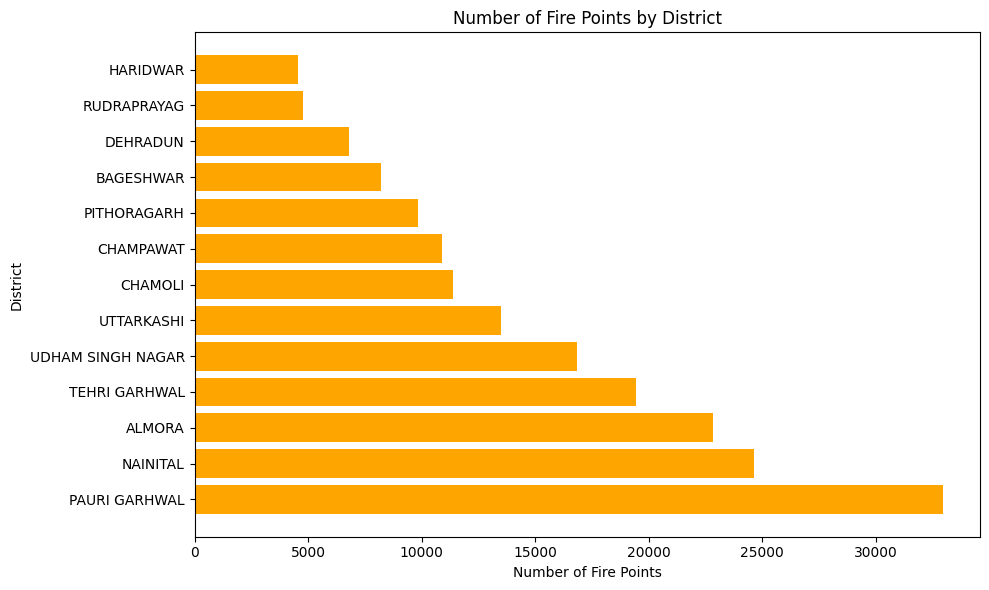

In [ ]:
# Group by district name and count fire points
fires_by_district = fires_with_districts.groupby("District").size().reset_index(name="fire_count")
print(fires_by_district)

# Plot fire count by district
fires_by_district = fires_by_district.sort_values(by="fire_count", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(fires_by_district["District"], fires_by_district["fire_count"], color="orange")
plt.title("Number of Fire Points by District")
plt.xlabel("Number of Fire Points")
plt.ylabel("District")
plt.tight_layout()
plt.show()


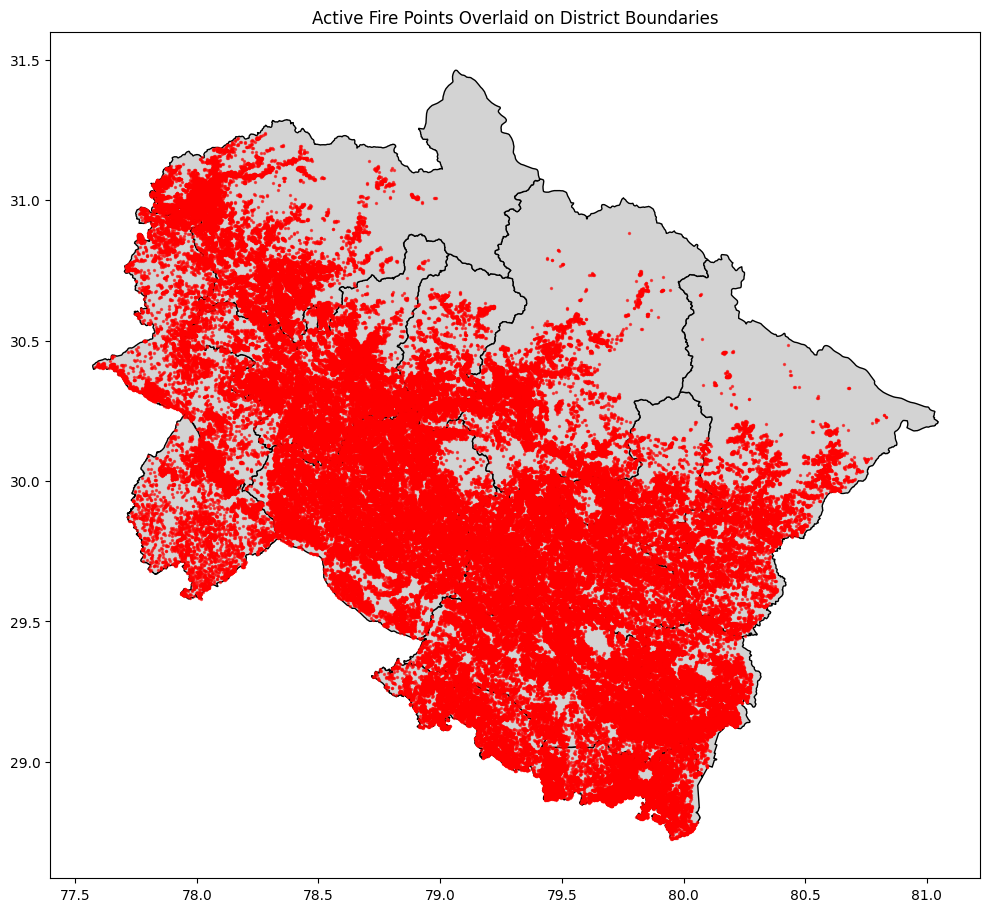

In [ ]:
import matplotlib.pyplot as plt

# Plot districts and fire points
ax = districts_gdf.plot(color="lightgrey", figsize=(12, 12), edgecolor="black")
fire_gdf.plot(ax=ax, markersize=2, color="red", alpha=0.6)
plt.title("Active Fire Points Overlaid on District Boundaries")
plt.show()


In [ ]:
fires_with_districts.columns

Index(['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_ti5', 'frp', 'daynight', 'type', 'STATE_left', 'State_LGD_left',
       'Shape_Leng_left', 'Shape_Area_left', 'geometry', 'index_right',
       'District', 'STATE_right', 'REMARKS', 'State_LGD_right', 'DISTRICT_L',
       'Shape_Leng_right', 'Shape_Area_right'],
      dtype='object')

In [ ]:
# Convert acq_date to datetime if it's not already
fires_with_districts['acq_date'] = pd.to_datetime(fires_with_districts['acq_date'])

# Extract the year and create a new column
fires_with_districts['year'] = fires_with_districts['acq_date'].dt.year

In [ ]:
fires_with_districts[['acq_date', 'year']].tail()

acq_date  year
186709 2024-06-22  2024
186710 2024-06-23  2024
186711 2024-06-23  2024
186712 2024-06-23  2024
186713 2024-06-25  2024

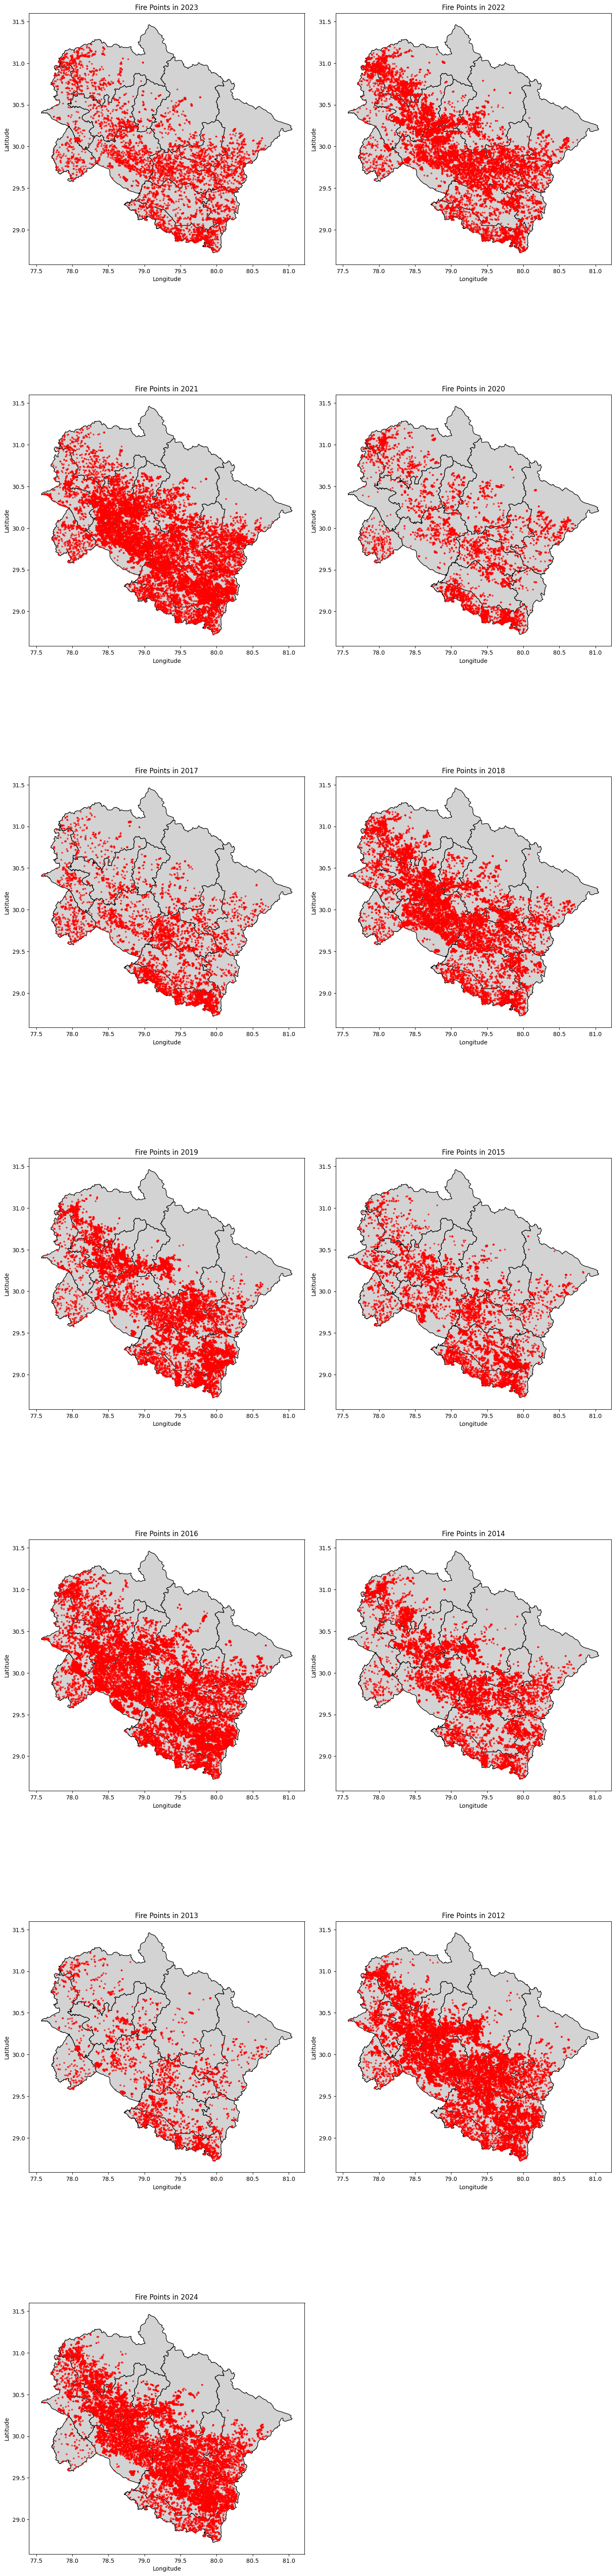

In [ ]:
# Get unique years
unique_years = fires_with_districts['year'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(
    nrows=len(unique_years) // 2 + len(unique_years) % 2,
    ncols=2,
    figsize=(15, len(unique_years) * 5)
)

# Flatten the axes array
axes = axes.flatten()

# Plot for each year
for idx, year in enumerate(unique_years):
    ax = axes[idx]
    # Filter data for the year
    yearly_fires = fires_with_districts[fires_with_districts['year'] == year]

    # Plot districts
    districts_gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

    # Plot fire points
    yearly_fires.plot(ax=ax, color="red", markersize=5, alpha=0.6)

    ax.set_title(f"Fire Points in {year}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# Remove unused subplots if any
for i in range(len(unique_years), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [ ]:
# Group by year and count the number of active fire points
fire_counts_by_year = fires_with_districts.groupby('year').size().reset_index(name='fire_count')


<ipython-input-46-6e14ec469a6d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fire_counts_by_year, x='year', y='fire_count', palette='flare')


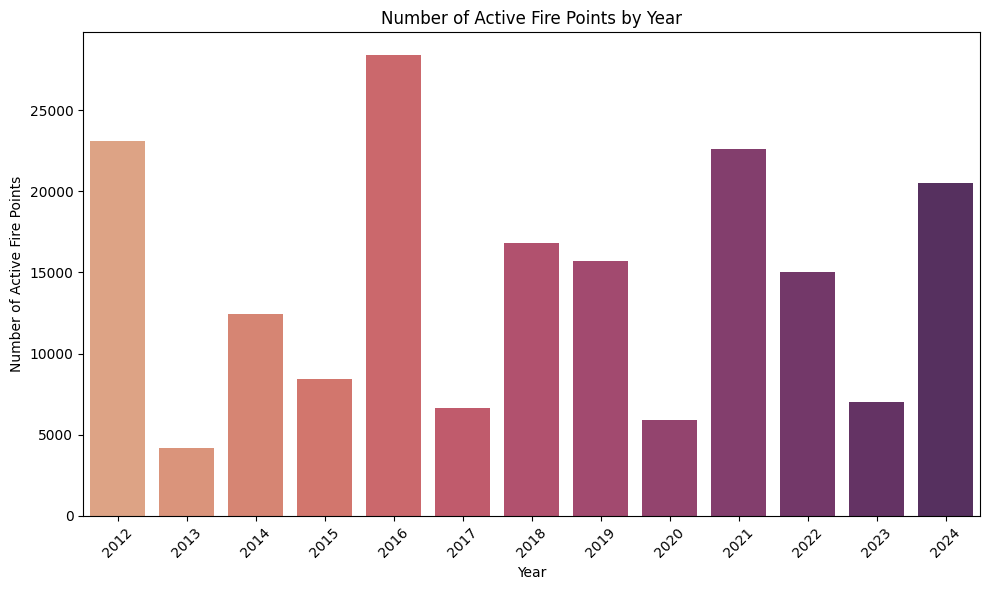

In [ ]:
import seaborn as sns

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=fire_counts_by_year, x='year', y='fire_count', palette='flare')
plt.title('Number of Active Fire Points by Year')
plt.xlabel('Year')
plt.ylabel('Number of Active Fire Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# Group by district and year, and count the number of active fire points
fire_counts_by_district_year = fires_with_districts.groupby(['District', 'year']).size().reset_index(name='fire_count')


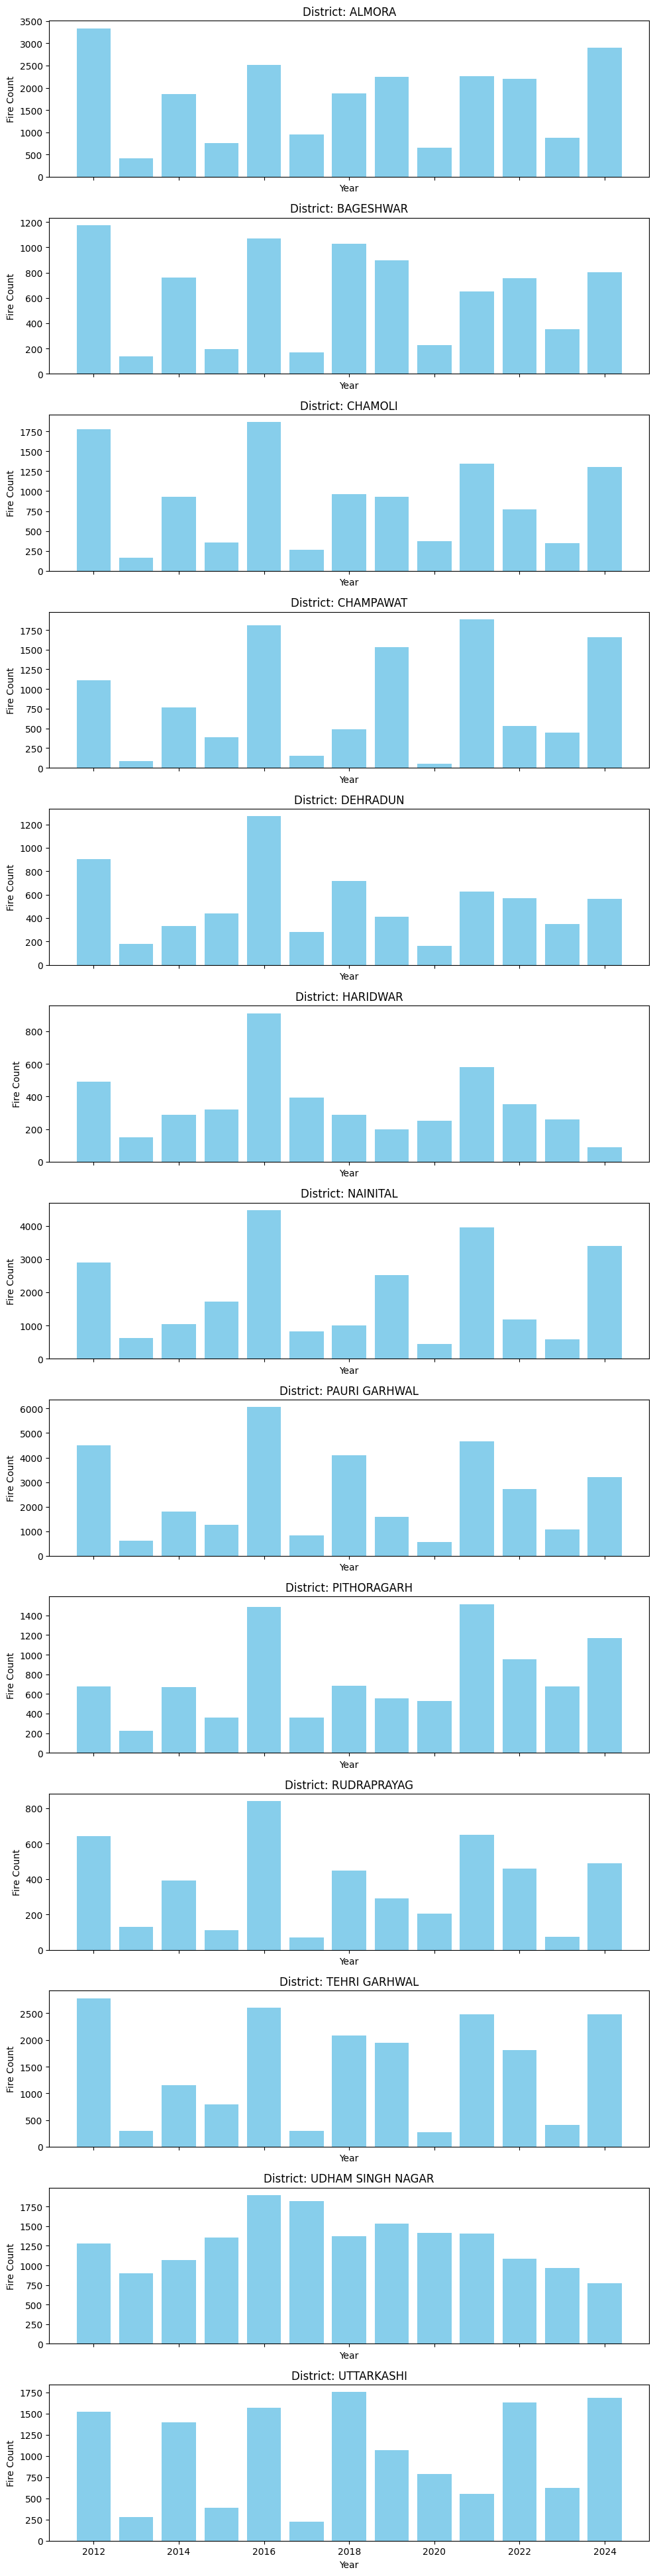

In [ ]:
# Get the list of unique districts
districts = fire_counts_by_district_year['District'].unique()

# Create subplots for each district
fig, axes = plt.subplots(len(districts), 1, figsize=(10, len(districts) * 3), sharex=True)

for ax, district in zip(axes, districts):
    district_data = fire_counts_by_district_year[fire_counts_by_district_year['District'] == district]
    ax.bar(district_data['year'], district_data['fire_count'], color='skyblue')
    ax.set_title(f'District: {district}')
    ax.set_ylabel('Fire Count')
    ax.set_xlabel('Year')

plt.tight_layout()
plt.show()


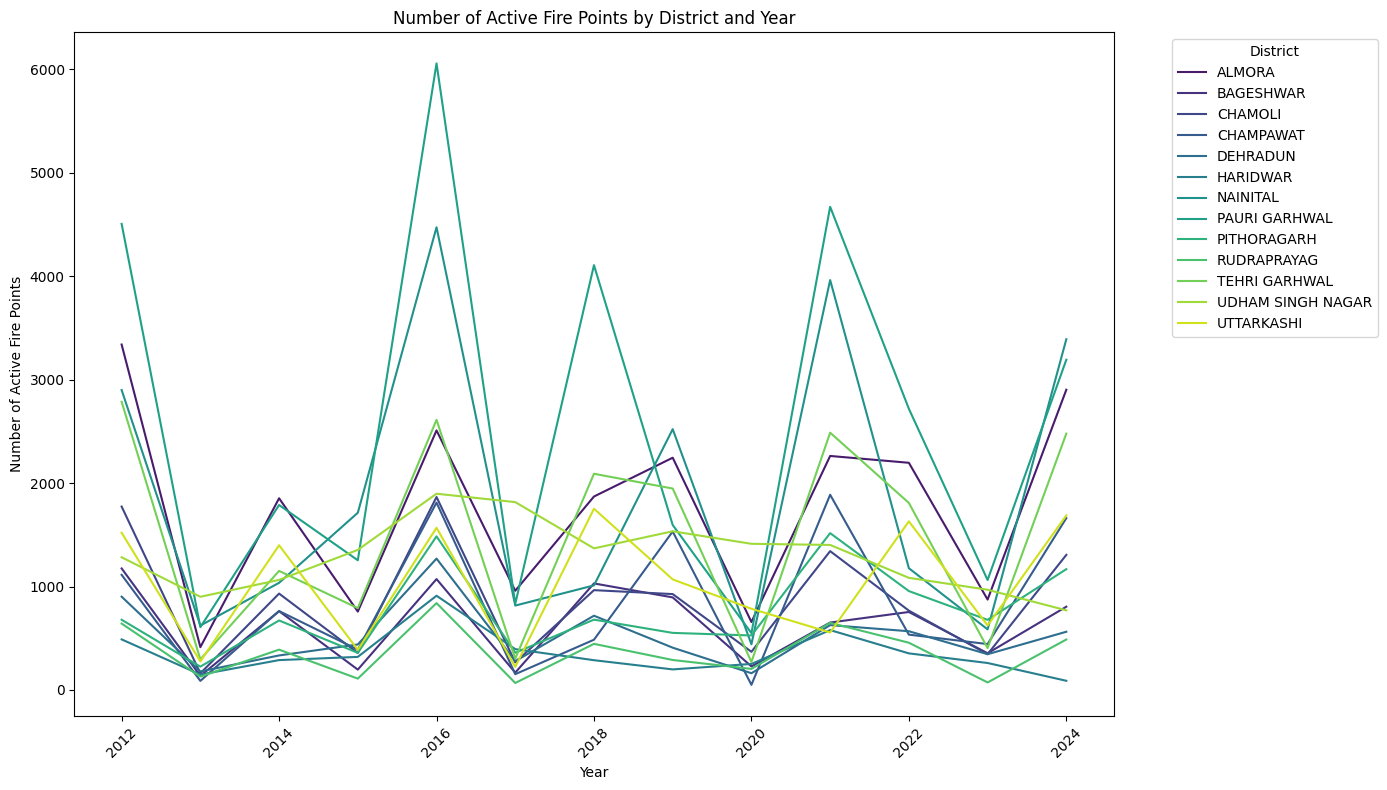

In [ ]:
# Plot grouped bar chart
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=fire_counts_by_district_year,
    x='year',
    y='fire_count',
    hue='District',
    palette='viridis'
)
plt.title('Number of Active Fire Points by District and Year')
plt.xlabel('Year')
plt.ylabel('Number of Active Fire Points')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
